________________________________________________________________________________
[Memory] Calling __main__-C%3A-Users-Administrator-__ipython-input__.get_data...
get_data()
_________________________________________________________get_data - 0.0s, 0.0min


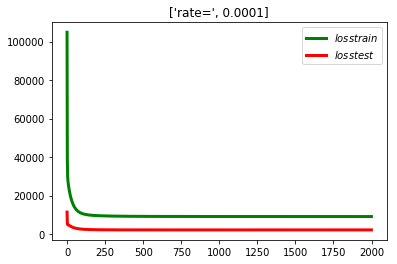

In [1]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.externals.joblib import Memory
from sklearn.datasets import load_svmlight_file

mem = Memory("./mycache")

@mem.cache
def get_data():
    data = load_svmlight_file("C:\\Users\\Administrator\\Desktop\\housing.txt")
    return data[0], data[1]

X, y = get_data()
X = X.todense()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

from numpy import *
w = mat(zeros((13, 1)))
b = np.random.normal()
b1 = mat(b)
w1 = vstack((w, b1))

def loss(x, y):
    hnum = len(x)
    k1 = mat(ones((hnum, 1)))
    xx = hstack((x, k1))
    y_t = mat(y).T
    tt = y_t - xx*w1
    return tt.T*tt

def gradient(x, y):
    hnum = len(x)
    k1 = mat(ones((hnum, 1)))
    xx = hstack((x, k1))
    xx_t = xx.T
    y_t = mat(y).T
    t1 = xx*w1

    return 2*xx_t*(t1 - y_t)

rate = 0.0001
listx = []
listy = []
listz = []
for i in range(2000):
    w1 = w1 - rate * gradient(X_train, y_train)
    listx.append(i)
    loss_train=loss(X_train, y_train)

    listy.append(loss_train[0, 0])
    loss_test = loss(X_test, y_test)

    listz.append(loss_test[0, 0])


plt.figure('model')
plt.plot(listx, listy, label="$losstrain$", color="green", linewidth=3)
plt.plot(listx, listz, label="$losstest$", color="red", linewidth=3)
plt.title(["rate=", rate])
plt.legend()
plt.show()